# Box-Cox Tranformation

### Box-Cox tranformation is a simple generalization of the square root transformation and the log transformation.

## $$\hat{x} = \begin{cases}
                \frac{x^{\lambda} - 1}{\lambda} & if \lambda \neq 0 \\
                 ln(x) & if \lambda = 0\\ \end{cases}$$
                 
### The Box-Cox transformation does only work with positive data. Therefore, sometimes you need to shift the data with adding a fixed constant. The power of $\lambda$ needs to be tuned that the box-cox module in scipy package does this process for you.

In [1]:
# Loading Libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pylab as pylab
import seaborn as sns
from scipy import stats
sns.set_style("ticks")



plot_params = {
               "legend.fontsize": "x-large",
               "figure.figsize": (10, 6),
               "axes.labelsize": "x-large",
               "axes.titlesize":"x-large",
               "xtick.labelsize":"x-large",
               "ytick.labelsize":"x-large",
               "axes.linewidth" : 3,
               "lines.linewidth" : 2
              }
pylab.rcParams.update(plot_params)


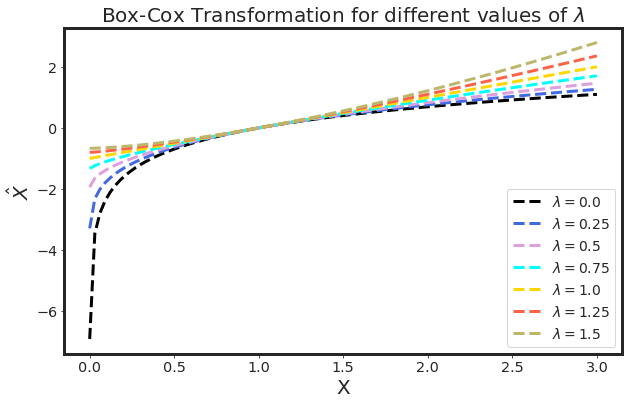

In [2]:
x = np.linspace(0.001 , 3., 100)
lambda_list = [0., 0.25, 0.50, 0.75, 1., 1.25, 1.50]
c = ["k", "royalblue", "plum", "aqua", "gold", "tomato", "darkkhaki"]

plt.figure(figsize=(10,6))
for l in lambda_list:
    plt.plot(x, stats.boxcox(x, lmbda = l), lw = 3, ls = "--", c = c[lambda_list.index(l)], label = F"$\lambda = {l}$")
plt.legend(loc = 0 , prop={'size': 14})
plt.xlabel("X", fontsize = 20)
plt.ylabel(r"$\hat{X}$", fontsize = 20)
plt.title(r"Box-Cox Transformation for different values of $\lambda$", fontsize = 20)
plt.show()
    

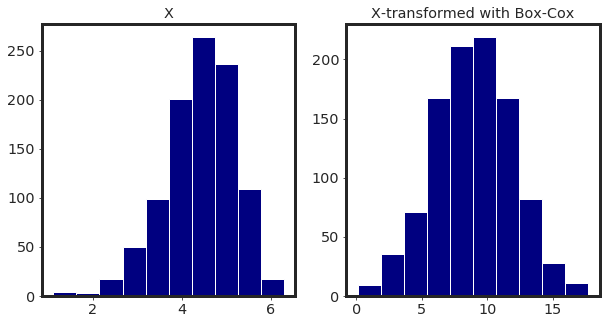

In [3]:
# using stats module in scipy
from scipy import stats

# non-normally distrubuted data
x = stats.loggamma.rvs(2, size = 1000) + 4
xt, lambda_optimal = stats.boxcox(x)

plt.figure(figsize = (10, 5))

plt.subplot(1,2,1)
plt.hist(x , color = "navy")
plt.title("X")


plt.subplot(1,2,2)
plt.hist(xt , color = "navy")
plt.title("X-transformed with Box-Cox")
plt.show()



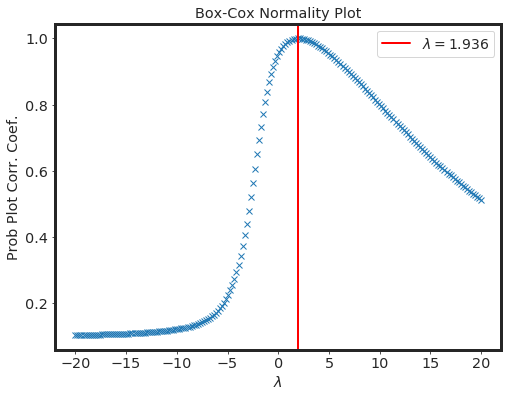

In [4]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
stats.boxcox_normplot(x, -20,20, plot = ax, N = 200);
ax.axvline(lambda_optimal, lw = 2, color='r', label = F"$\lambda = {lambda_optimal:.4}$");
plt.legend(loc = 0 , prop={'size': 14})
plt.show()


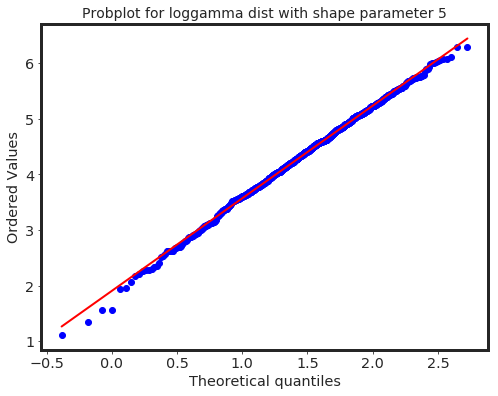

In [5]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
res = stats.probplot(x, dist=stats.loggamma, sparams=(5,), plot=ax)
ax.set_title("Probplot for loggamma dist with shape parameter 5", fontsize = 14);